In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/franciscorossi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Since the data was only avaiable in german we provide a translation table so that you can also understand what the original names were  

Translation table:  

# general translations
Bundesland = state

# features
#### general
Wahlkreis-Nr. = constituency number  
Wahlkreis-Name = constituency name 
Gemeinden am 31.12.2015 (Anzahl) = municipalities  
Fläche am 31.12.2015 (km^2) = area in km^2  

##### (The results table)  
Gebiet = area name  
gehört zu = belongs to  
Wahlberechtigte = eligible voters  
Wähler = voters  
Ungültige = invalid votes  
gültige = valid votes  


##### parties
Christlich Demokratische Union Deutschlands = cdu  
Sozialdemokratische Partei Deutschlands = spd  
Die Linke = linke  
BÜNDNIS 90/DIE GRÜNEN = green  
Freie Demokratische Partei = fdp  
Alternative für Deutschland = afd  

#### population  
Bevölkerung am 31.12.2015 - Insgesamt (in 1000) = population - total (in thousands)  
Bevölkerung am 31.12.2015 - Deutsche (in 1000) = population - germans (in thousands)  
Bevölkerung am 31.12.2015 - Ausländer (%) = population - foreigners (%)  
Bevölkerungsdichte am 31.12.2015 (Einwohner je km^2) = population density (inhabitants per km^2)  
Zu- (+) bzw. Abnahme (-) der Bevölkerung 2015 - Geburtensaldo (je 1000 Einwohner) = increase or decrease in population due to birth/death (per 1000 inhabitants)   
Zu- (+) bzw. Abnahme (-) der Bevölkerung 2015 - Wanderungssaldo (je 1000 Einwohner) =  increase or decrease in population due to migration (per 1000 inhabitants)

#### age
Alter von ... bis ... Jahren am 31.12.2015 - unter 18 (%) = aged under 18 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 18-24 (%) = aged 18 to 24 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 25-34 (%) = aged 25 to 34 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 35-59 (%) = aged 35 to 59 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 60-74 (%) = aged 60 to 74 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 75 und mehr (%) = aged 75 an older (%)  

### 2011 data
#### migration
Zensus 2011, Bevölkerung nach Migrationshintergrund am 09.05.2011 - ohne Migrationshintergrund (%) = inhibitants without a migration background (%)  
Zensus 2011, Bevölkerung nach Migrationshintergrund am 09.05.2011 - mit Migrationshintergrund (%) = inhibitants with a migration background (%)  

#### religion
Zensus 2011, Bevölkerung nach Religionszugehörigkeit am 09.05.2011 - Römisch-katholische Kirche (%) = religion - roman catholic (%)  
Zensus 2011, Bevölkerung nach Religionszugehörigkeit am 09.05.2011 - Evangelische Kirche (%) = religion - evangelical (%)  
Zensus 2011, Bevölkerung nach Religionszugehörigkeit am 09.05.2011 - Sonstige, keine, ohne Angabe (%) = religion - other, none, not specified (%)  

#### real estate
Zensus 2011, Wohnungen in Wohngebäuden am 09.05.2011 - Eigentümerquote = real estate ownership rate (%)
Bautätigkeit und Wohnungswesen - Fertiggestellte Wohnungen 2014 (je 1000 Einwohner) = completed apartments in 2014 (per 1000 inhbitants)
Bautätigkeit und Wohnungswesen - Bestand an Wohnungen am 31.12.2015 (je 1000 Einwohner) = Stock of apartments (per 1000 inhabitants)

#### income
Verfügbares Einkommen der privaten Haushalte 2014 (€ je Einwohner) = available income for private household € (per inhabitant)  
Bruttoinlandsprodukt 2014 (€ je Einwohner) = gdp per capita in €  

#### vehicles
Kraftfahrzeugbestand am 01.01.2016 (je 1000 Einwohner) = Motor vehicles (per 1000 inhabitants)  

#### education
Absolventen/Abgänger beruflicher Schulen 2015 = graduates of vocational schools  
Absolventen/Abgänger allgemeinbildender Schulen 2015 - insgesamt ohne Externe (je 1000 Einwohner) = graduates of general schools (per 1000 inhabitants)  
Absolventen/Abgänger allgemeinbildender Schulen 2015 - ohne Hauptschulabschluss (%) = graduates of general schools - without hauptschulabschluss (%)  
Absolventen/Abgïänger allgemeinbildender Schulen 2015 - mit Hauptschulabschluss (%) = graduates of general schools - with hauptschulabschluss (%)  
Absolventen/Abgänger allgemeinbildender Schulen 2015 - mit mittlerem Schulabschluss (%) = graduates of general schools - with mittlerem Schulabschluss (%)  
Absolventen/Abgänger allgemeinbildender Schulen 2015 - mit allgemeiner und Fachhochschulreife (%) = graduates of general schools - with allgemeiner and Fachhochschulereife (%)  

#### child care
Kindertagesbetreuung: Betreute Kinder am 01.03.2016 (je 1000 Einwohner) = children cared for (per 1000 inhabitants)  

#### economical
Unternehmensregister 2014 - Unternehmen insgesamt (je 1000 Einwohner) = companies registered (per 1000 inhabitants)  
Unternehmensregister 2014 - Handwerksunternehmen (je 1000 Einwohner) = handicraft companies registered (per 1000 inhabitants)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - insgesamt (je 1000 Einwohner) = employed and required to pay social secruity (per 1000 inhabitants)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - Land- und Forstwirtschaft, Fischerei (%) = employed and required to pay social secruity in - agriculture, forestry and fishing (%)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - Produzierendes Gewerbe (%) = employed and required to pay social secruity in - manufacturing (%)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - Handel, Gastgewerbe, Verkehr (%) = employed and required to pay social secruity in - trade, hospitality, transport (%)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - öffentliche und private Dienstleister (%) = employed and required to pay social secruity in - public and private service providers (%)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - übrige Dienstleister und 'ohne Angabe' (%) = employed and required to pay social secruity in - other service providers or not specified (%)  

#### unemployment
Empfänger(innen) von Leistungen nach SGB II am 31.12.2016 -  insgesamt (je 1000 Einwohner) = receivers of social spending (per 1000 inhabitants)  

Empfänger(innen) von Leistungen nach SGB II am 31.12.2016 - nicht erwerbsfähige Hilfebedürftige (%) = receivers of social spending - unable to work (%)  
Empfänger(innen) von Leistungen nach SGB II am 31.12.2016 - Ausländer (%) = receivers of social spending - foreigners (%)  
Arbeitslosenquote März 2017 - insgesamt = unemployment rate (%)  
Arbeitslosenquote März 2017 - Männer = unemployment rate - male (%)  
Arbeitslosenquote März 2017 - Frauen = unemployment rate - female (%)  
Arbeitslosenquote März 2017 - 15 bis unter 20 Jahre = unemployment rate - 15 to under 20 year olds (%)  
Arbeitslosenquote März 2017 - 55 bis unter 65 Jahre = unemployment rate - 55 to under 65 year olds (%)  

In [291]:
results = pd.read_csv("results_transformed.csv", sep=";", decimal=',')

# all partys
partys = list(results.columns[7:])


In [307]:
feautures = pd.read_csv("features_transformed.csv", sep=";", decimal=',')
col2replace = list(feautures.select_dtypes(exclude=['float64', 'int64']).columns)
col2replace.remove('state')
feautures[col2replace] = feautures[col2replace].replace(".", 0)
feautures[col2replace] = feautures[col2replace].apply(lambda x: pd.to_numeric(x.str.replace(",",".")))


In [288]:
# Merge of both the results and the feautures dataframes
df_all = results.join(feautures, on='constituency number', lsuffix='_', rsuffix='')
# Checking if all columns are there
df_all.shape[1] == feautures.shape[1] + results.shape[1]

True

<AxesSubplot:>

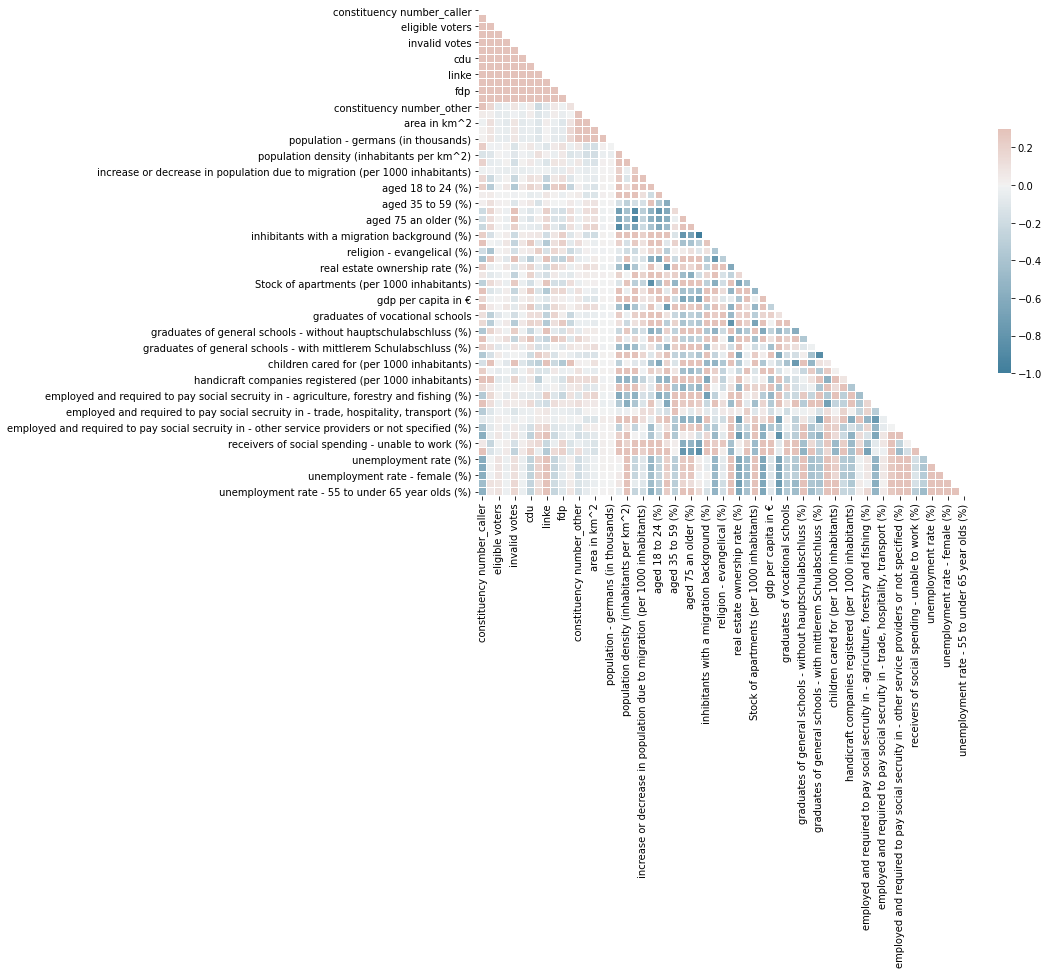

In [258]:
# Compute the correlation matrix
corr = df_all.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

,cdu,spd,linke,green,fdp,afd
constituency number_caller,0.416684,0.410739,0.418561,0.416892,0.413896,0.421365
belongs to,0.671292,0.642599,0.821244,0.658715,0.635339,0.763854
eligible voters,0.999183,0.996595,0.994259,0.995728,0.998250,0.995729
voters,0.999369,0.996359,0.993805,0.996198,0.998302,0.995675
invalid votes,0.994350,0.992917,0.996411,0.992433,0.994353,0.996140
...,...,...,...,...,...,...
unemployment rate (%),-0.270152,0.204075,0.362652,-0.244388,-0.078713,0.021769
unemployment rate - male (%),-0.269588,0.196798,0.371791,-0.244199,-0.093449,0.021739
unemployment rate - female (%),-0.266154,0.210525,0.345423,-0.241394,-0.059484,0.020820
unemployment rate - 15 to under 20 year olds (%),-0.256353,0.111435,0.389771,-0.190093,-0.094589,0.044644
